# 1. Property info

### property json

In [1]:
import pandas as pd

# property info
real_estate_info = pd.read_json('real_state.json')
real_estate_info.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
0,75900,-37.902695,145.099504,2/77 Burlington Street,6760000,house,2016,3,2,2
1,35689,-37.709918,145.015804,87 Crookston Road,7100000,house,2016,3,1,2
2,80315,-37.996460,145.179312,5 Cameron Place,7380000,house,2015,5,3,2
3,21964,-37.727173,144.949916,137 Sussex Street,8820000,house,2015,3,1,1
4,65657,-37.766579,145.319361,11 Ashton Avenue,6120000,house,2014,3,2,2


### property xml

In [2]:
file = open('real_state.xml', 'r')
xml_string = file.read()[2:-1]
file.close()

file = open('real_state_change.xml', 'w')
file.write(xml_string)
file.close()

In [3]:
import xml.etree.ElementTree as et 
xtree = et.parse('real_state_change.xml')
xroot = xtree.getroot()

for node in xroot:
    print(node)

<Element 'property_id' at 0x000001B78AFD12C8>
<Element 'lat' at 0x000001B78B0CF548>
<Element 'lng' at 0x000001B78B1236D8>
<Element 'addr_street' at 0x000001B78B17EC28>
<Element 'price' at 0x000001B78B205EF8>
<Element 'property_type' at 0x000001B78B28A3B8>
<Element 'year' at 0x000001B78B30D818>
<Element 'bedrooms' at 0x000001B78B391C78>
<Element 'bathrooms' at 0x000001B78B406138>
<Element 'parking_space' at 0x000001B78B47A598>


In [4]:
from lxml import objectify

df_cols = ['property_id', 'lat', 'lng', 'addr_street', 'price', 'property_type', 'year', 'bedrooms','bathrooms','parking_space']

real_estate_xml = pd.DataFrame(columns = df_cols)
xml = objectify.parse('real_state_change.xml')
root = xml.getroot()

d = {}

for i in df_cols:
    d[i] = [child.text for child in root[i].getchildren()]

df_xml = pd.DataFrame(d)

In [5]:
print(df_xml.shape)
print(real_estate_info.shape)

(1006, 10)
(1010, 10)


### concat json and xml df

In [6]:
# concat together
df = pd.concat([real_estate_info, df_xml])
df.shape

(2016, 10)

### remove duplicates

In [7]:
# drop duplicates
df.drop_duplicates(inplace = True)

In [8]:
df = df.reset_index().drop(['index'], axis = 1)
df

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
0,75900,-37.9027,145.1,2/77 Burlington Street,6760000,house,2016,3,2,2
1,35689,-37.7099,145.016,87 Crookston Road,7100000,house,2016,3,1,2
2,80315,-37.9965,145.179,5 Cameron Place,7380000,house,2015,5,3,2
3,21964,-37.7272,144.95,137 Sussex Street,8820000,house,2015,3,1,1
4,65657,-37.7666,145.319,11 Ashton Avenue,6120000,house,2014,3,2,2
...,...,...,...,...,...,...,...,...,...,...
2004,3076,-37.822007,144.892211,200-204 Stephen Street,6050000,house,2010,2,1,1
2005,57469,-37.830461,145.163419,1 Leons Court,15860000,house,2016,4,2,2
2006,4711,-37.84449768,144.87402340000003,88 Anderson Street,5950000,house,2008,3,1,2
2007,96520,-38.004247,145.286187,148 Emily Drive,5100000,house,2012,3,2,2


### change to numbers

In [9]:
# change to numeric attribute
numerical_attribute = ['lat', 'lng', 'price','year','bedrooms', 'bathrooms', 'parking_space']

for i in numerical_attribute:
    df[i] = pd.to_numeric(df[i])

In [10]:
df.dtypes

property_id       object
lat              float64
lng              float64
addr_street       object
price              int64
property_type     object
year               int64
bedrooms           int64
bathrooms          int64
parking_space      int64
dtype: object

# 2. Shopping centre

In [11]:
sc = pd.read_html('shopingcenters.html')[0]
sc

,Unnamed: 0,sc_id,lat,lng
0,0,SC_001,-37.767915,145.041790
1,1,SC_002,-37.819375,145.171472
2,2,SC_003,-37.971131,145.089065
3,3,SC_004,-35.280406,149.132550
4,4,SC_005,-37.574572,144.920451
...,...,...,...,...
114,114,SC_115,-38.014916,145.323404
115,115,SC_116,43.105259,-76.091619
116,116,SC_117,-38.005454,145.217573
117,117,SC_118,-37.486265,144.589067


In [12]:
import math

def get_distance(lat1, lon1, lat2, lon2):
    R = 6378
    
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c
    
    return round(distance,4)

In [13]:
sc_id = []
sc_dist = []

for idx, row in df.iterrows():
    min_dist = float('inf')
    min_name = None
    
    for idx_sc, row_sc, in sc.iterrows():
        dist = get_distance(row['lat'], row['lng'], row_sc['lat'], row_sc['lng'])
        if dist < min_dist:
            min_dist = dist
            min_name = row_sc['sc_id']
    
    sc_id.append(min_name)
    sc_dist.append(min_dist)

In [14]:
df['Shopping_center_id'] = sc_id
df['Distance_to_sc'] = sc_dist

# 3. Hospital

In [15]:
hospital = pd.read_excel('hospitals.xlsx')
hospital.head()

,Unnamed: 0,id,lat,lng,name
0,0,hospital_001,-37.990622,145.072836,Como Private Hospital
1,1,hospital_002,-37.855469,145.268183,Mountain District Private Hospital
2,2,hospital_003,-37.792230,144.889128,Western Hospital
3,3,hospital_004,-37.756042,145.061896,Mercy Hospital for Women
4,4,hospital_005,-37.760623,144.815624,Sunshine Hospital


In [16]:
hos_id = []
hos_dist = []

for idx, row in df.iterrows():
    min_dist = float('inf')
    min_name = None
    
    for idx_hos, row_hos, in hospital.iterrows():
        dist = get_distance(row['lat'], row['lng'], row_hos['lat'], row_hos['lng'])
        if dist < min_dist:
            min_dist = dist
            min_name = row_hos['id']
    
    hos_id.append(min_name)
    hos_dist.append(min_dist)

In [17]:
df['Hospital_id'] = hos_id
df['Distance_to_hospital'] = hos_dist

In [18]:
df.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,Shopping_center_id,Distance_to_sc,Hospital_id,Distance_to_hospital
0,75900,-37.902695,145.099504,2/77 Burlington Street,6760000,house,2016,3,2,2,SC_087,2.2365,hospital_166,0.6850
1,35689,-37.709918,145.015804,87 Crookston Road,7100000,house,2016,3,1,2,SC_047,3.4339,hospital_139,1.7796
2,80315,-37.996460,145.179312,5 Cameron Place,7380000,house,2015,5,3,2,SC_057,0.6693,hospital_096,0.7937
3,21964,-37.727173,144.949916,137 Sussex Street,8820000,house,2015,3,1,1,SC_030,0.5828,hospital_084,3.0885
4,65657,-37.766579,145.319361,11 Ashton Avenue,6120000,house,2014,3,2,2,SC_084,1.0528,hospital_113,3.1594


# 4. Supermarkets

In [19]:
from tabula import read_pdf
sm = read_pdf('supermarkets.pdf',  multiple_tables=True, pages="all")

In [20]:
len(sm)

5

In [21]:
sm_all = pd.concat([i for i in sm])

In [22]:
sm_all

,Unnamed: 0,id,lat,lng,type
0,0,S_001,-37.883978,144.735287,Woolworths
1,1,S_002,-41.161591,147.514797,Woolworths
2,2,S_003,-37.984078,145.077167,Woolworths
3,3,S_004,-37.707023,144.938740,Woolworths
4,4,S_005,-37.597670,144.938413,Woolworths
...,...,...,...,...,...
40,234,S_235,-37.860188,145.028920,Coles
41,235,S_236,-37.875984,144.614490,Coles
42,236,S_237,-37.047330,143.744610,Coles
43,237,S_238,-38.351648,144.922881,Coles


In [23]:
sm_id = []
sm_dist = []

for idx, row in df.iterrows():
    min_dist = float('inf')
    min_name = None
    
    for idx_hos, row_sm, in sm_all.iterrows():
        dist = get_distance(row['lat'], row['lng'], row_sm['lat'], row_sm['lng'])
        if dist < min_dist:
            min_dist = dist
            min_name = row_sm['id']
    
    sm_id.append(min_name)
    sm_dist.append(min_dist)

In [24]:
df['Supermarket_id'] = sm_id
df['Distance_to_supermaket'] = sm_dist

In [25]:
df.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,Shopping_center_id,Distance_to_sc,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermaket
0,75900,-37.902695,145.099504,2/77 Burlington Street,6760000,house,2016,3,2,2,SC_087,2.2365,hospital_166,0.6850,S_026,2.1820
1,35689,-37.709918,145.015804,87 Crookston Road,7100000,house,2016,3,1,2,SC_047,3.4339,hospital_139,1.7796,S_225,2.0201
2,80315,-37.996460,145.179312,5 Cameron Place,7380000,house,2015,5,3,2,SC_057,0.6693,hospital_096,0.7937,S_079,0.7098
3,21964,-37.727173,144.949916,137 Sussex Street,8820000,house,2015,3,1,1,SC_030,0.5828,hospital_084,3.0885,S_172,2.1020
4,65657,-37.766579,145.319361,11 Ashton Avenue,6120000,house,2014,3,2,2,SC_084,1.0528,hospital_113,3.1594,S_168,0.8406


# 5. Suburb

In [26]:
# import library
import shapefile
# read shape file
shape_file = shapefile.Reader("VIC_LOCALITY_POLYGON_shp.shp")
# retrieve all the records in the shape file
shapeRecs = shape_file.records()
# retrieve shape in the shape file
shapes = shape_file.shapes()

In [27]:
shapeRecs[0]

Record #0: ['6670', datetime.date(2011, 8, 31), None, 'VIC2615', datetime.date(2012, 4, 27), None, 'UNDERBOOL', '', '', 'G', None, '2']

Extract all the suburb name.

In [28]:
suburb_list = []
# retrieve the suburb name
for i in shapeRecs:
    suburb_list.append(i[6])

In [29]:
shapes[0].points

[(141.74552399, -35.07228701),
 (141.74552471, -35.07201624),
 (141.74748471, -35.06367123),
 (141.74909525, -35.05681288),
 (141.74917403, -35.05647197),
 (141.75887404, -35.05225699),
 (141.77005396, -35.04914101),
 (141.77057401, -35.04899703),
 (141.76823304, -35.04349501),
 (141.76757096, -35.04270197),
 (141.76709398, -35.03982199),
 (141.76544215, -35.03808514),
 (141.76547768, -35.03782986),
 (141.76408494, -35.03523684),
 (141.76398063, -35.03505673),
 (141.76387633, -35.03487661),
 (141.75923139, -35.02629546),
 (141.77479178, -35.02631526),
 (141.77477947, -35.02789069),
 (141.79121543, -35.02632192),
 (141.79143466, -35.02629765),
 (141.79143596, -35.04874003),
 (141.79351097, -35.04729598),
 (141.79428796, -35.04709498),
 (141.79636183, -35.04970131),
 (141.79864596, -35.05329199),
 (141.79782903, -35.05527899),
 (141.79795996, -35.056872),
 (141.79605705, -35.05895805),
 (141.79644599, -35.06340397),
 (141.79743197, -35.06573301),
 (141.79758596, -35.06874604),
 (141.7995

In [30]:
# create a dictionary in which the key is the suburb name and the value is a list of all the boundary points for that suburb
sub_coordinate = {}
for i in range(len(suburb_list)):
    sub_coordinate[suburb_list[i]] = shapes[i].points

In [32]:
df.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,Shopping_center_id,Distance_to_sc,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermaket
0,75900,-37.902695,145.099504,2/77 Burlington Street,6760000,house,2016,3,2,2,SC_087,2.2365,hospital_166,0.6850,S_026,2.1820
1,35689,-37.709918,145.015804,87 Crookston Road,7100000,house,2016,3,1,2,SC_047,3.4339,hospital_139,1.7796,S_225,2.0201
2,80315,-37.996460,145.179312,5 Cameron Place,7380000,house,2015,5,3,2,SC_057,0.6693,hospital_096,0.7937,S_079,0.7098
3,21964,-37.727173,144.949916,137 Sussex Street,8820000,house,2015,3,1,1,SC_030,0.5828,hospital_084,3.0885,S_172,2.1020
4,65657,-37.766579,145.319361,11 Ashton Avenue,6120000,house,2014,3,2,2,SC_084,1.0528,hospital_113,3.1594,S_168,0.8406


In [34]:
# import library
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

# empty list to store result
suburb = []
index = []

# check if the coordinates of the property is inside a suburb
for idx, row in df.iterrows():
    point = Point(row['lng'], row['lat'])
    added = False
    for key, val in sub_coordinate.items():
        polygon = Polygon(val)
        if polygon.contains(point):
            suburb.append(key)
            index.append(idx)
            added = True
            break
    if added == False:
        suburb.append('not available')

In [39]:
for i in range(len(suburb)):
    if suburb[i] == 'not available':
        print(i)

1367


In [41]:
sub_coordinate['BELLFIELD']

[(142.48511797, -37.15734709),
 (142.49545785, -37.15728586),
 (142.49582796, -37.1572829999999),
 (142.49667899, -37.15779699),
 (142.49670104, -37.15857197),
 (142.49701899, -37.15868195),
 (142.49721797, -37.15874995),
 (142.49806503, -37.15727002),
 (142.49831446, -37.15726881),
 (142.51763434, -37.15715167),
 (142.51764071, -37.15912106),
 (142.52032679, -37.15911767),
 (142.52362676, -37.15911331),
 (142.52492949, -37.15911156),
 (142.52492909, -37.15921525),
 (142.52492872, -37.1593136),
 (142.52495203, -37.1653326),
 (142.52885369, -37.16533907),
 (142.52885646, -37.16604704),
 (142.52886343, -37.16782461),
 (142.52886111, -37.16801808),
 (142.52621727, -37.16802504),
 (142.52623835, -37.1755162),
 (142.53494803, -37.17551874),
 (142.53696599, -37.17551922),
 (142.537487, -37.17550093),
 (142.53766285, -37.17549652),
 (142.53817705, -37.17549517),
 (142.53840088, -37.17549458),
 (142.53865975, -37.1754939),
 (142.54185783, -37.17548541),
 (142.54173204, -37.17416036),
 (142.541

In [40]:
df.loc[1367]

property_id                         39151
lat                              -37.7507
lng                               145.039
addr_street               17 Toohey Court
price                             4650000
property_type                       house
year                                 2014
bedrooms                                2
bathrooms                               1
parking_space                           1
Shopping_center_id                 SC_047
Distance_to_sc                     1.5382
Hospital_id                  hospital_090
Distance_to_hospital                0.954
Supermarket_id                      S_219
Distance_to_supermaket             1.9699
Name: 1367, dtype: object

In [42]:
df['suburb'] = suburb
df.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,Shopping_center_id,Distance_to_sc,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermaket,suburb
0,75900,-37.902695,145.099504,2/77 Burlington Street,6760000,house,2016,3,2,2,SC_087,2.2365,hospital_166,0.6850,S_026,2.1820,OAKLEIGH
1,35689,-37.709918,145.015804,87 Crookston Road,7100000,house,2016,3,1,2,SC_047,3.4339,hospital_139,1.7796,S_225,2.0201,RESERVOIR
2,80315,-37.996460,145.179312,5 Cameron Place,7380000,house,2015,5,3,2,SC_057,0.6693,hospital_096,0.7937,S_079,0.7098,KEYSBOROUGH
3,21964,-37.727173,144.949916,137 Sussex Street,8820000,house,2015,3,1,1,SC_030,0.5828,hospital_084,3.0885,S_172,2.1020,PASCOE VALE
4,65657,-37.766579,145.319361,11 Ashton Avenue,6120000,house,2014,3,2,2,SC_084,1.0528,hospital_113,3.1594,S_168,0.8406,MOOROOLBARK


# train stops

In [68]:
train_stop = pd.read_csv('stops.txt')
train_stop.head()

,stop_id,stop_name,stop_short_name,stop_lat,stop_lon
0,15351,Sunbury Railway Station,Sunbury,-37.579091,144.727319
1,15353,Diggers Rest Railway Station,Diggers Rest,-37.627017,144.719922
2,19827,Stony Point Railway Station,Crib Point,-38.374235,145.221837
3,19828,Crib Point Railway Station,Crib Point,-38.366123,145.204043
4,19829,Morradoo Railway Station,Crib Point,-38.354033,145.189602


In [51]:
stop_id = []
stop_dist = []

for idx, row in df.iterrows():
    min_dist = float('inf')
    min_name = None
    
    for idx_hos, row_stop, in train_stop.iterrows():
        dist = get_distance(row['lat'], row['lng'], row_stop['stop_lat'], row_stop['stop_lon'])
        if dist < min_dist:
            min_dist = dist
            min_name = row_stop['stop_id']
    
    stop_id.append(min_name)
    stop_dist.append(min_dist)

In [55]:
df['Train_station_id'] = stop_id
df['Distance_to_train_station'] = stop_dist

In [56]:
df.to_csv('temp.csv', index = False)

# trip

In [77]:
stop_times = pd.read_csv('stop_times.txt')
trip = pd.read_csv('trips.txt')
stop_times.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,17182517.T2.2-ALM-B-mjp-1.1.H,04:57:00,04:57:00,19847,1,NaN,0,0,0.000000
1,17182517.T2.2-ALM-B-mjp-1.1.H,04:58:00,04:58:00,19848,2,NaN,0,0,723.017818
2,17182517.T2.2-ALM-B-mjp-1.1.H,05:00:00,05:00:00,19849,3,NaN,0,0,1951.735072
3,17182517.T2.2-ALM-B-mjp-1.1.H,05:02:00,05:02:00,19850,4,NaN,0,0,2899.073349
4,17182517.T2.2-ALM-B-mjp-1.1.H,05:04:00,05:04:00,19851,5,NaN,0,0,3927.090952


In [78]:
trip.head()

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id
0,2-ALM-F-mjp-1,T0,17067982.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
1,2-ALM-F-mjp-1,T0,17067988.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
2,2-ALM-F-mjp-1,T0,17067992.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
3,2-ALM-F-mjp-1,T0,17067999.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
4,2-ALM-F-mjp-1,T0,17068003.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0


In [79]:
trip = pd.merge(stop_times, trip, on = 'trip_id')
trip.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,route_id,service_id,shape_id,trip_headsign,direction_id
0,17182517.T2.2-ALM-B-mjp-1.1.H,04:57:00,04:57:00,19847,1,NaN,0,0,0.000000,2-ALM-B-mjp-1,T2,2-ALM-B-mjp-1.1.H,City (Flinders Street),0
1,17182517.T2.2-ALM-B-mjp-1.1.H,04:58:00,04:58:00,19848,2,NaN,0,0,723.017818,2-ALM-B-mjp-1,T2,2-ALM-B-mjp-1.1.H,City (Flinders Street),0
2,17182517.T2.2-ALM-B-mjp-1.1.H,05:00:00,05:00:00,19849,3,NaN,0,0,1951.735072,2-ALM-B-mjp-1,T2,2-ALM-B-mjp-1.1.H,City (Flinders Street),0
3,17182517.T2.2-ALM-B-mjp-1.1.H,05:02:00,05:02:00,19850,4,NaN,0,0,2899.073349,2-ALM-B-mjp-1,T2,2-ALM-B-mjp-1.1.H,City (Flinders Street),0
4,17182517.T2.2-ALM-B-mjp-1.1.H,05:04:00,05:04:00,19851,5,NaN,0,0,3927.090952,2-ALM-B-mjp-1,T2,2-ALM-B-mjp-1.1.H,City (Flinders Street),0


### determine weekday service

In [80]:
df_calendar = pd.read_csv('calendar.txt')
df_calendar.head()

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,T2,0,0,0,0,0,1,0,20151009,20151011
1,UJ,0,0,0,0,0,0,1,20151009,20151011
2,T6,0,0,0,0,1,0,0,20151009,20151011
3,T5,1,1,1,1,0,0,0,20151012,20151015
4,T2_1,0,0,0,0,0,1,0,20151016,20151018


In [81]:
df_calendar[(df_calendar['monday'] == 1) &(df_calendar['tuesday'] == 1) &
              (df_calendar['wednesday'] == 1) &(df_calendar['thursday'] == 1) &(df_calendar['friday'] == 1)&
              (df_calendar['saturday'] == 0) & (df_calendar['sunday'] == 0)]

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
8,T0,1,1,1,1,1,0,0,20151023,20151122


### filter out non weekday service

In [82]:
trip = trip[trip['service_id'] == 'T0']

# change to date time object
trip['departure_time'] = pd.to_datetime(trip['departure_time'], errors='coerce')
trip['arrival_time'] = pd.to_datetime(trip['arrival_time'], errors='coerce')
# drop unncessary columns
trip = trip.drop(columns = ['stop_headsign','pickup_type','drop_off_type'])

In [83]:
trip.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,shape_dist_traveled,route_id,service_id,shape_id,trip_headsign,direction_id
8568,17067982.T0.2-ALM-F-mjp-1.1.H,2020-10-20 05:01:00,2020-10-20 05:01:00,19847,1,0.000000,2-ALM-F-mjp-1,T0,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
8569,17067982.T0.2-ALM-F-mjp-1.1.H,2020-10-20 05:02:00,2020-10-20 05:02:00,19848,2,723.017818,2-ALM-F-mjp-1,T0,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
8570,17067982.T0.2-ALM-F-mjp-1.1.H,2020-10-20 05:04:00,2020-10-20 05:04:00,19849,3,1951.735072,2-ALM-F-mjp-1,T0,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
8571,17067982.T0.2-ALM-F-mjp-1.1.H,2020-10-20 05:06:00,2020-10-20 05:06:00,19850,4,2899.073349,2-ALM-F-mjp-1,T0,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
8572,17067982.T0.2-ALM-F-mjp-1.1.H,2020-10-20 05:08:00,2020-10-20 05:08:00,19851,5,3927.090952,2-ALM-F-mjp-1,T0,2-ALM-F-mjp-1.1.H,City (Flinders Street),0


# check going to flinders for each train station

In [84]:
train_stop

,stop_id,stop_name,stop_short_name,stop_lat,stop_lon
0,15351,Sunbury Railway Station,Sunbury,-37.579091,144.727319
1,15353,Diggers Rest Railway Station,Diggers Rest,-37.627017,144.719922
2,19827,Stony Point Railway Station,Crib Point,-38.374235,145.221837
3,19828,Crib Point Railway Station,Crib Point,-38.366123,145.204043
4,19829,Morradoo Railway Station,Crib Point,-38.354033,145.189602
...,...,...,...,...,...
213,44817,Coolaroo Railway Station,Coolaroo,-37.661003,144.926056
214,45793,Lynbrook Railway Station,Lynbrook,-38.057341,145.249275
215,45794,Cardinia Road Railway Station,Pakenham,-38.071290,145.437791
216,45795,South Morang Railway Station,South Morang,-37.649159,145.067032


In [86]:
trip.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,shape_dist_traveled,route_id,service_id,shape_id,trip_headsign,direction_id
8568,17067982.T0.2-ALM-F-mjp-1.1.H,2020-10-20 05:01:00,2020-10-20 05:01:00,19847,1,0.000000,2-ALM-F-mjp-1,T0,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
8569,17067982.T0.2-ALM-F-mjp-1.1.H,2020-10-20 05:02:00,2020-10-20 05:02:00,19848,2,723.017818,2-ALM-F-mjp-1,T0,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
8570,17067982.T0.2-ALM-F-mjp-1.1.H,2020-10-20 05:04:00,2020-10-20 05:04:00,19849,3,1951.735072,2-ALM-F-mjp-1,T0,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
8571,17067982.T0.2-ALM-F-mjp-1.1.H,2020-10-20 05:06:00,2020-10-20 05:06:00,19850,4,2899.073349,2-ALM-F-mjp-1,T0,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
8572,17067982.T0.2-ALM-F-mjp-1.1.H,2020-10-20 05:08:00,2020-10-20 05:08:00,19851,5,3927.090952,2-ALM-F-mjp-1,T0,2-ALM-F-mjp-1.1.H,City (Flinders Street),0


In [87]:
for i in range(len(train_stop)):
    if 'Flinders' in train_stop.loc[i, 'stop_name']:
        print(i)

29


In [88]:
train_stop.loc[29]

stop_id                                      19854
stop_name          Flinders Street Railway Station
stop_short_name                     Melbourne City
stop_lat                                  -37.8183
stop_lon                                   144.967
Name: 29, dtype: object

In [89]:
go_to_flinders = []

for index, row in train_stop.iterrows():
    # station id
    station_id = row['stop_id']
    
    if 'Flinders' in row['stop_name']:
        go_to_flinders.append(True)
    else:
        flag = False
        
        trip_temp = trip[(trip['stop_id']== station_id)&
                            (trip['departure_time'] >= '07:00')&
                            (trip['departure_time'] <= '09:30')]
        
        for index_trip, row_trip in trip_temp.iterrows():
            start_sequence = row_trip['stop_sequence']
            
            try:
                arrival = trip[(trip['trip_id'] == row_trip['trip_id']) & 
                                      (trip['stop_sequence'] > start_sequence) &
                                      (trip['stop_id'] == 19854)].iloc[0,1]
                flag = True
                break
            except:
                continue
        go_to_flinders.append(flag)

In [92]:
go_to_flinders

[True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 Tru

In [94]:
train_stop['go_to_flinders'] = go_to_flinders

In [95]:
train_stop

,stop_id,stop_name,stop_short_name,stop_lat,stop_lon,go_to_flinders
0,15351,Sunbury Railway Station,Sunbury,-37.579091,144.727319,True
1,15353,Diggers Rest Railway Station,Diggers Rest,-37.627017,144.719922,True
2,19827,Stony Point Railway Station,Crib Point,-38.374235,145.221837,False
3,19828,Crib Point Railway Station,Crib Point,-38.366123,145.204043,False
4,19829,Morradoo Railway Station,Crib Point,-38.354033,145.189602,False
...,...,...,...,...,...,...
213,44817,Coolaroo Railway Station,Coolaroo,-37.661003,144.926056,True
214,45793,Lynbrook Railway Station,Lynbrook,-38.057341,145.249275,True
215,45794,Cardinia Road Railway Station,Pakenham,-38.071290,145.437791,True
216,45795,South Morang Railway Station,South Morang,-37.649159,145.067032,True


In [96]:
df.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,Shopping_center_id,Distance_to_sc,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermaket,suburb,Train_station_id,Distance_to_train_station
0,75900,-37.902695,145.099504,2/77 Burlington Street,6760000,house,2016,3,2,2,SC_087,2.2365,hospital_166,0.6850,S_026,2.1820,OAKLEIGH,19916,0.9599
1,35689,-37.709918,145.015804,87 Crookston Road,7100000,house,2016,3,1,2,SC_047,3.4339,hospital_139,1.7796,S_225,2.0201,RESERVOIR,20009,0.5976
2,80315,-37.996460,145.179312,5 Cameron Place,7380000,house,2015,5,3,2,SC_057,0.6693,hospital_096,0.7937,S_079,0.7098,KEYSBOROUGH,19889,2.2955
3,21964,-37.727173,144.949916,137 Sussex Street,8820000,house,2015,3,1,1,SC_030,0.5828,hospital_084,3.0885,S_172,2.1020,PASCOE VALE,19963,1.2204
4,65657,-37.766579,145.319361,11 Ashton Avenue,6120000,house,2014,3,2,2,SC_084,1.0528,hospital_113,3.1594,S_168,0.8406,MOOROOLBARK,19877,2.1133


In [103]:
go_to_flinders = []
for i in range(len(df)):
    station_id = df.loc[i, 'Train_station_id']
    flag = train_stop[train_stop['stop_id'] == station_id].iloc[0,5]
    go_to_flinders.append(1-flag)

In [106]:
df['Transfer_flag'] = go_to_flinders

In [107]:
df.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,Shopping_center_id,Distance_to_sc,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermaket,suburb,Train_station_id,Distance_to_train_station,Transfer_flag
0,75900,-37.902695,145.099504,2/77 Burlington Street,6760000,house,2016,3,2,2,SC_087,2.2365,hospital_166,0.6850,S_026,2.1820,OAKLEIGH,19916,0.9599,0
1,35689,-37.709918,145.015804,87 Crookston Road,7100000,house,2016,3,1,2,SC_047,3.4339,hospital_139,1.7796,S_225,2.0201,RESERVOIR,20009,0.5976,0
2,80315,-37.996460,145.179312,5 Cameron Place,7380000,house,2015,5,3,2,SC_057,0.6693,hospital_096,0.7937,S_079,0.7098,KEYSBOROUGH,19889,2.2955,0
3,21964,-37.727173,144.949916,137 Sussex Street,8820000,house,2015,3,1,1,SC_030,0.5828,hospital_084,3.0885,S_172,2.1020,PASCOE VALE,19963,1.2204,0
4,65657,-37.766579,145.319361,11 Ashton Avenue,6120000,house,2014,3,2,2,SC_084,1.0528,hospital_113,3.1594,S_168,0.8406,MOOROOLBARK,19877,2.1133,0


In [108]:
df.to_csv('temp.csv',index = False)

# average time to CBD

In [112]:
CBD_min = []
# iterate over housing dataframe
for index, row in df.iterrows():
    # station_id
    station_id = row['Train_station_id']
    # initialize trip count and travel time to 0
    trip_count = 0
    trip_min = 0
    
    # if the closest station is southern cross, directly append 0
    if row['Train_station_id'] == 19854:
        CBD_min.append(0)
        
    # check type of train service
    else:
        #obtain inbounding trip info for that station
        temp_trip = trip[(trip['stop_id']== station_id)&
                            (trip['departure_time'] >= '07:00')&
                            (trip['departure_time'] <= '09:30')]
    
        # loop over each inbounding trip
        for index_trip, row_trip in temp_trip.iterrows():
            # store the start stop sequence
            start_sequence = row_trip['stop_sequence']
            # check whether that trip goes to southern cross
            try:
                arrival =  trip[(trip['trip_id'] == row_trip['trip_id']) & 
                                      (trip['stop_sequence'] > start_sequence) &
                                      (trip['stop_id'] == 19854)].iloc[0,1]
            # if not, continue to check next trip
            except:
                continue
            # get departure time
            departure = trip[(trip['trip_id'] == row_trip['trip_id']) &
                                    (trip['stop_id'] == station_id)].iloc[0,2]
            # calculate travel time
            travel_time = (arrival-departure).total_seconds()/60
            trip_min += travel_time
            trip_count +=1
                
        if trip_count == 0:
            CBD_min.append(trip_min)
        else:
            CBD_min.append(trip_min/trip_count)

In [121]:
df['travel_min_to_CBD'] = CBD_min

# Reorder column

In [124]:
df = df[['property_id', 'lat', 'lng', 'addr_street', 'suburb', 'price', 'property_type',\
   'year', 'bedrooms', 'bathrooms', 'parking_space', 'Shopping_center_id','Distance_to_sc',\
   'Train_station_id','Distance_to_train_station','travel_min_to_CBD', 'Transfer_flag',\
   'Hospital_id','Distance_to_hospital','Supermarket_id','Distance_to_supermaket']]

In [125]:
df.rename(columns = {'property_id':'Property_id'}, inplace = True)

In [126]:
df

,Property_id,lat,lng,addr_street,suburb,price,property_type,year,bedrooms,bathrooms,...,Shopping_center_id,Distance_to_sc,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermaket
0,75900,-37.902695,145.099504,2/77 Burlington Street,OAKLEIGH,6760000,house,2016,3,2,...,SC_087,2.2365,19916,0.9599,35.600000,0,hospital_166,0.6850,S_026,2.1820
1,35689,-37.709918,145.015804,87 Crookston Road,RESERVOIR,7100000,house,2016,3,1,...,SC_047,3.4339,20009,0.5976,32.642857,0,hospital_139,1.7796,S_225,2.0201
2,80315,-37.996460,145.179312,5 Cameron Place,KEYSBOROUGH,7380000,house,2015,5,3,...,SC_057,0.6693,19889,2.2955,50.117647,0,hospital_096,0.7937,S_079,0.7098
3,21964,-37.727173,144.949916,137 Sussex Street,PASCOE VALE,8820000,house,2015,3,1,...,SC_030,0.5828,19963,1.2204,31.750000,0,hospital_084,3.0885,S_172,2.1020
4,65657,-37.766579,145.319361,11 Ashton Avenue,MOOROOLBARK,6120000,house,2014,3,2,...,SC_084,1.0528,19877,2.1133,54.384615,0,hospital_113,3.1594,S_168,0.8406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,3076,-37.822007,144.892211,200-204 Stephen Street,YARRAVILLE,6050000,house,2010,2,1,...,SC_033,4.0302,19996,0.7140,15.642857,0,hospital_056,3.2575,S_201,2.4209
2005,57469,-37.830461,145.163419,1 Leons Court,BLACKBURN,15860000,house,2016,4,2,...,SC_002,1.4228,19899,1.4906,36.400000,0,hospital_060,0.7027,S_066,0.6043
2006,4711,-37.844498,144.874023,88 Anderson Street,NEWPORT,5950000,house,2008,3,1,...,SC_033,3.1117,19994,0.8648,20.629630,0,hospital_141,2.5189,S_056,2.6280
2007,96520,-38.004247,145.286187,148 Emily Drive,HALLAM,5100000,house,2012,3,2,...,SC_077,3.3244,19885,2.0803,58.333333,0,hospital_069,3.3125,S_212,1.8013


In [127]:
df.to_csv('output.csv', index = False)

# Data reshaping

In [24]:
import pandas as pd
df = pd.read_csv('output.csv')

In [25]:
# retrieve the features to be processed
df_feature = df[['Distance_to_sc','travel_min_to_CBD','Distance_to_hospital','price']].copy()
df_feature

,Distance_to_sc,travel_min_to_CBD,Distance_to_hospital,price
0,2.2365,35.600000,0.6850,6760000
1,3.4339,32.642857,1.7796,7100000
2,0.6693,50.117647,0.7937,7380000
3,0.5828,31.750000,3.0885,8820000
4,1.0528,54.384615,3.1594,6120000
...,...,...,...,...
2004,4.0302,15.642857,3.2575,6050000
2005,1.4228,36.400000,0.7027,15860000
2006,3.1117,20.629630,2.5189,5950000
2007,3.3244,58.333333,3.3125,5100000


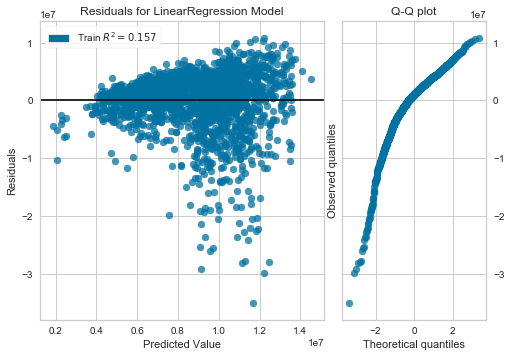

In [26]:
# import library
from sklearn import linear_model
from sklearn.metrics import r2_score
from yellowbrick.regressor import ResidualsPlot
import numpy as np


# fit data to model
regr = linear_model.LinearRegression()
visualiser = ResidualsPlot(regr,hist = False, qqplot= True)
visualiser.fit(df_feature.iloc[:,0:3], df_feature['price'])
visualiser.show()

# make prediction
# price_pred = regr.predict(df_feature[cols])

# # print out performance measure
# print('Original:',r2_score(df_feature['price'],price_pred))
# print(regr.coef_)

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit_transform(df_feature)
scaler = pd.DataFrame(scaler)
scaler

,0,1,2,3
0,-0.240295,0.178371,-0.885911,-0.382845
1,0.625952,-0.059776,-0.261850,-0.322124
2,-1.374070,1.347517,-0.823939,-0.272118
3,-1.436647,-0.131680,0.484390,-0.014945
4,-1.096631,1.691148,0.524812,-0.497144
...,...,...,...,...
2004,1.057340,-1.428833,0.580742,-0.509645
2005,-0.828958,0.242797,-0.875820,1.242344
2006,0.392860,-1.027235,0.159645,-0.527505
2007,0.546736,2.009150,0.612099,-0.679308


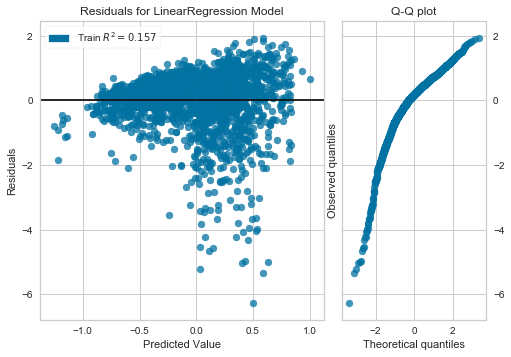

In [29]:
regr = linear_model.LinearRegression()
visualiser = ResidualsPlot(regr,hist = False, qqplot= True)
visualiser.fit(scaler.iloc[:,0:3], scaler.iloc[:,3])
visualiser.show()

# log

In [30]:
log = np.log(df_feature[df_feature['travel_min_to_CBD'] != 0])
log

,Distance_to_sc,travel_min_to_CBD,Distance_to_hospital,price
0,0.804912,3.572346,-0.378336,15.726533
1,1.233697,3.485626,0.576389,15.775605
2,-0.401523,3.914373,-0.231050,15.814284
3,-0.539911,3.457893,1.127686,15.992532
4,0.051453,3.996081,1.150382,15.627073
...,...,...,...,...
2004,1.393816,2.750014,1.180960,15.615569
2005,0.352627,3.594569,-0.352825,16.579311
2006,1.135169,3.026728,0.923822,15.598902
2007,1.201289,4.066174,1.197703,15.444751


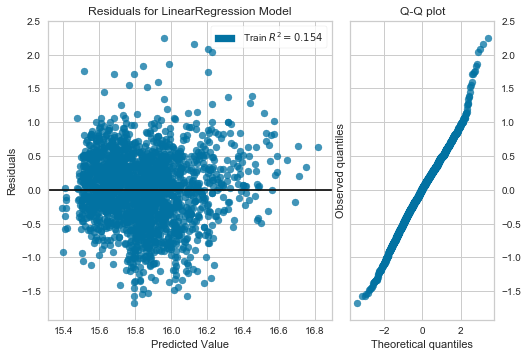

In [31]:
regr = linear_model.LinearRegression()
visualiser = ResidualsPlot(regr,hist = False, qqplot= True)
visualiser.fit(log.iloc[:,0:3], log['price'])
visualiser.show()

# root

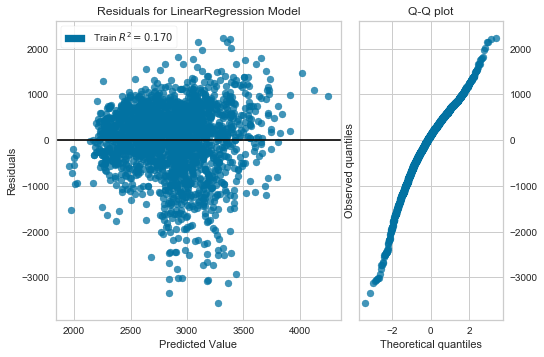

In [32]:
regr = linear_model.LinearRegression()
visualiser = ResidualsPlot(regr,hist = False, qqplot= True)
visualiser.fit(np.sqrt(df_feature.iloc[:,0:3]), np.sqrt(df_feature.iloc[:,3]))
visualiser.show()

# power

In [33]:
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer()
power = transformer.fit_transform(df_feature)
power = pd.DataFrame(power)
power

,0,1,2,3
0,-0.083674,0.190354,-1.165369,-0.189216
1,0.729261,-0.046216,0.017667,-0.100639
2,-1.672556,1.334586,-1.005679,-0.031028
3,-1.793489,-0.117918,0.794488,0.287435
4,-1.193210,1.666351,0.826646,-0.369648
...,...,...,...,...
2004,1.066115,-1.439661,0.869932,-0.390596
2005,-0.798145,0.254124,-1.138425,1.309172
2006,0.530898,-1.023713,0.505231,-0.420973
2007,0.663262,1.971812,0.893611,-0.703556


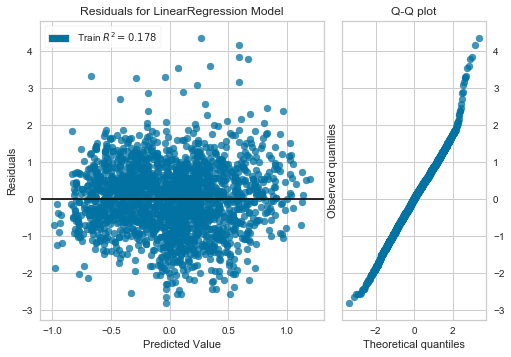

In [34]:
regr = linear_model.LinearRegression()
visualiser = ResidualsPlot(regr,hist = False, qqplot= True)
visualiser.fit(power.iloc[:,0:3], power.iloc[:,3])
visualiser.show()